# PROJECT : Number Recognition


# Name: Raj C. Mhatre

*Email id :rmhatre404@gmail.com (mailto:rmhatre404@gmail.com) , contact No.: +91-9768877272*

*Linkedin ID: https://www.linkedin.com/in/raj-c-mhatre-571b67219/*

In [1]:
# Importing libraries:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [2]:
# Importing Data:

from tensorflow.keras.datasets import mnist

In [3]:
# Splitting dataset into training and testing format:

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# 60,000 images for training:

X_train.shape

(60000, 28, 28)

In [5]:
# 10,000 images for testing:

X_test.shape

(10000, 28, 28)

In [6]:
# Output labels of images:

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# Using suffling method for keeping randomness in image selection:

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

(-0.5, 27.5, 27.5, -0.5)

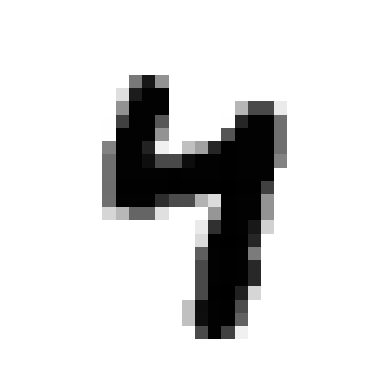

In [8]:
# Displaying image by using matplot:

plt.imshow(X_train[1000], cmap="binary")
plt.axis("off")

In [9]:
# Pixel values for the selected images:

X_train[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 232, 109,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
# Normalizing pixel values of all images:

X_train = X_train/255
X_test = X_test/255

In [11]:
# Here we can see the difference, all values are between 0 to 1:

X_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# Neural Network:

model = Sequential()
model.add(Flatten(input_shape=(28,28)))     # Image format in 28X28 pixels
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))     # Hidden Layers
model.add(Dropout(0.2))                     # To reduce Noise
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))   # For Multiclass classification

In [13]:
# Model summary:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [14]:
# Compiling a model by giving loss funtions and all:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 2s 2ms/step - loss: 0.4777 - accuracy: 0.8535 - val_loss: 0.1870 - val_accuracy: 0.9423
Epoch 2/25
750/750 [==============================] - 1s 2ms/step - loss: 0.2338 - accuracy: 0.9300 - val_loss: 0.1387 - val_accuracy: 0.9565
Epoch 3/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9449 - val_loss: 0.1186 - val_accuracy: 0.9630
Epoch 4/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1594 - accuracy: 0.9507 - val_loss: 0.1052 - val_accuracy: 0.9677
Epoch 5/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1411 - accuracy: 0.9563 - val_loss: 0.0956 - val_accuracy: 0.9714
Epoch 6/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9610 - val_loss: 0.0915 - val_accuracy: 0.9722
Epoch 7/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1200 - accuracy: 0.9632 - val_loss: 0.0912 - val_accuracy: 0.9722
Epoch 

In [16]:
# Running created model on test image dataset:

y_prob = model.predict(X_test)

313/313 [==============================] - 0s 666us/step


In [17]:
# Showing maximum possibility of label will occure:

y_prob

array([[1.07771329e-13, 1.34059153e-09, 1.77856492e-07, ...,
        9.99999881e-01, 1.29286009e-11, 2.71229901e-08],
       [3.59197025e-12, 2.14912161e-05, 9.99978423e-01, ...,
        1.23732899e-11, 7.29491023e-10, 2.66401747e-18],
       [1.84863869e-09, 9.99997973e-01, 1.04054386e-07, ...,
        2.52679712e-07, 9.61688556e-07, 1.54097526e-10],
       ...,
       [1.12258810e-14, 2.71716261e-10, 6.55208179e-12, ...,
        8.91495375e-08, 2.27476278e-08, 9.82041365e-06],
       [4.06413098e-11, 2.38341139e-12, 1.14156555e-13, ...,
        3.22607804e-12, 4.14921851e-06, 1.62818028e-13],
       [3.31942945e-11, 6.10043971e-15, 7.96249405e-13, ...,
        9.05050878e-20, 3.96676608e-10, 1.07175155e-14]], dtype=float32)

In [18]:
# Return the indices of the max elements by using argmax function:

y_pred = y_prob.argmax(axis=1)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
# Accuracy of model for testing:

from sklearn.metrics import accuracy_score
print(f"Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9804


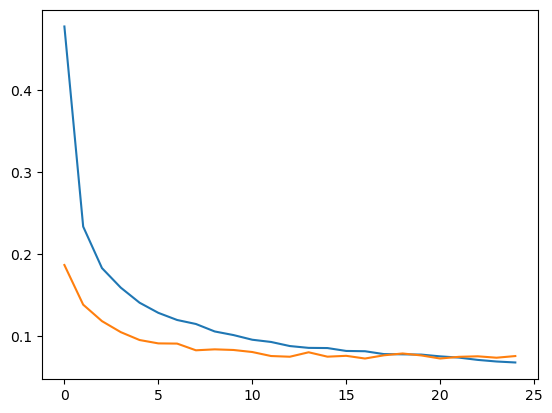

In [21]:
# Plotting a result of loss and val_loss of model:

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

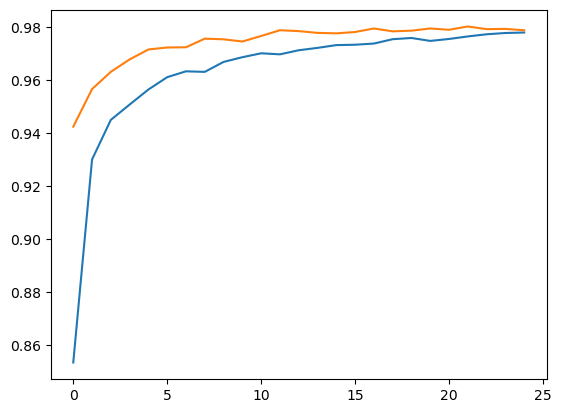

In [22]:
# Plotting a result of accuracy and val_accuracy of model:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

(-0.5, 27.5, 27.5, -0.5)

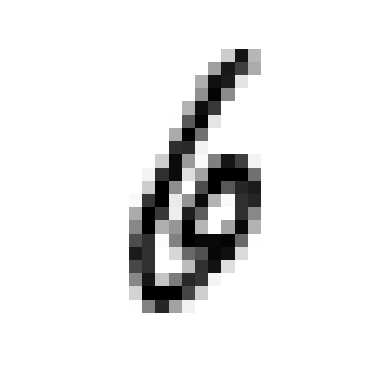

In [23]:
# Displaying random image by selecting:

plt.imshow(X_test[1908], cmap="binary")
plt.axis("off")

In [24]:
# Will show the prediction of the image we choose earliar:

Predicted_Number = model.predict(np.array([X_test[1908]]))
Predicted_Number = np.argmax(Predicted_Number,axis=1)
print(f"Predicted Number:",Predicted_Number)

1/1 [==============================] - 0s 14ms/step
Predicted Number: [6]
